In [1]:
from fastai.tabular import *
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path = r"/gdrive/My Drive/FINAL_Pruned_Dataset/train/"

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, bs=128).normalize(imagenet_stats)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['MSIMUT', 'MSS'], 2, 8636, 2158)

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [8]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.976372,0.766421,0.684430,31:12
1,0.830331,0.690766,0.709453,01:47
2,0.666685,0.575914,0.714550,01:41
3,0.579702,0.539672,0.722428,01:40
4,0.532402,0.494432,0.769694,01:44
5,0.502900,0.485546,0.768767,01:43
6,0.479104,0.466313,0.783596,01:43
7,0.459535,0.461303,0.774328,01:42
8,0.429847,0.415708,0.803985,01:40
9,0.417409,0.408134,0.813253,01:38


In [9]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


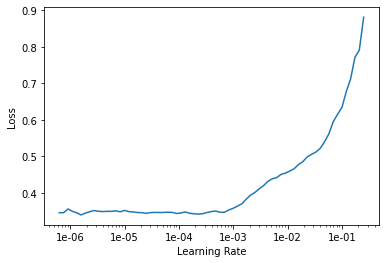

In [10]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(15, max_lr=slice(5e-06, 1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.220416,0.312438,0.866080,01:49
1,0.221942,0.360317,0.854958,01:50
2,0.228019,0.316223,0.873957,01:48
3,0.223972,0.416060,0.845227,01:49
4,0.204887,0.383742,0.869787,01:48
5,0.183784,0.391979,0.875348,01:52
6,0.160072,0.340067,0.882762,01:51
7,0.134826,0.328321,0.892030,01:52
8,0.114377,0.335407,0.887396,01:51
9,0.096628,0.299651,0.902688,01:50


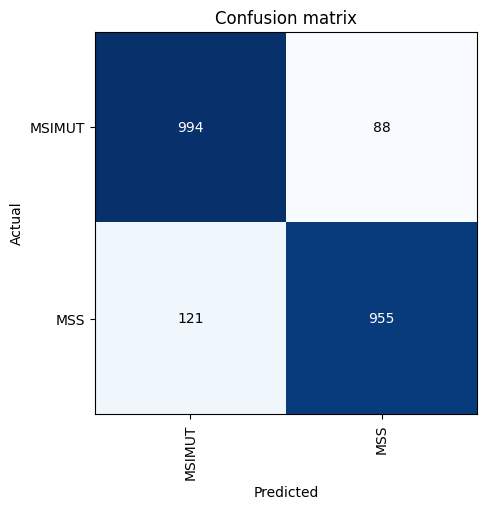

In [14]:
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

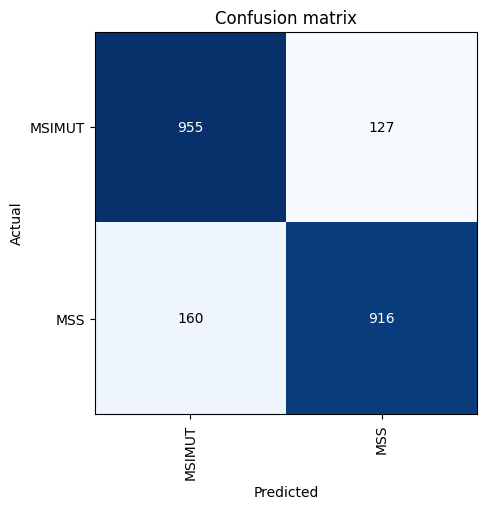

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [15]:
learn.save('/gdrive/My Drive/FastaiRESNETmodel')